In [278]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [279]:
from collections import Counter

In [321]:
df_time = pd.read_csv('./bin/9_19_1000_time_result.csv')

In [281]:
df_time['reconcILSTime'][33]

0.9625570599891944

In [282]:
df_time['dlcparTime'][31]

0.5474172579997685

<AxesSubplot:>

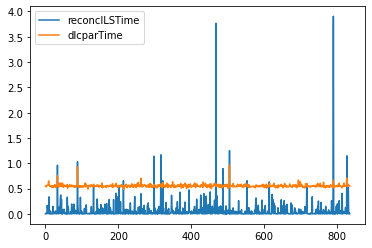

In [283]:
df_time[['reconcILSTime','dlcparTime']].plot()

In [284]:
df_time[['reconcILSTime','dlcparTime']].mean()

reconcILSTime    0.069832
dlcparTime       0.554922
dtype: float64

In [285]:
list(df_time[df_time.reconcILSTime>50]['Gene_tree'])

[]

In [286]:
df_diff_D = df_time[df_time['dlcparTime']<df_time['reconcILSTime']].fillna('')
df_diff_D

,Replicate,Gene_tree,reconcILSTime,dlcparTime
33,40,"((((((A,A),A),(A,A)),A),(A,A)),(B,C));",0.962557,0.755544
88,102,"((((((B,C),B),B),(C,B)),(A,B)),C);",1.030542,0.928811
214,253,"((((C,C),((B,B),C)),B),A);",0.658344,0.553096
298,351,"(((A,A),(((C,C),B),(B,C))),A);",1.141082,0.587176
317,377,"(((A,A),A),((((C,B),B),B),A));",1.168662,0.595688
322,383,"(A,(((C,((B,C),C)),A),B));",0.655082,0.623220
468,549,"(((A,A),A),(((C,B),(B,C)),((C,C),B)));",3.764758,0.543630
487,571,"((B,C),(((C,C),C),((A,A),A)));",0.897446,0.551892
505,590,"(((((C,B),(C,B)),A),((C,C),((C,C),B))),(C,B));",1.250543,0.965528
553,649,"(((A,A),((C,(C,B)),B)),A);",0.656495,0.594439


In [287]:
df_diff_D[(df_diff_D.reconcILSTime >100)]

,Replicate,Gene_tree,reconcILSTime,dlcparTime


In [322]:
df = pd.read_csv('./bin/9_19_1000_result.csv')

In [323]:
df

,Process,Replicate,Gene_tree,Species_Tree,Duplication,NNI,DLCILS,Loss,Hemiplasy,RHemiplasy
0,True Process,0,"(A,B);","((A,(B,C));",0,0,0,1,0,1
1,DLCpar,0,"(A,B);","((A,(B,C));",0,0,0,1,0,0
2,Our_algorithm,0,"(A,B);","((A,(B,C));",0,0,0,1,0,0
3,True Process,1,"((C,B),B);","((A,(B,C));",1,1,1,1,0,1
4,DLCpar,1,"((C,B),B);","((A,(B,C));",1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
2503,DLCpar,998,"((A,C),A);","((A,(B,C));",1,0,0,2,0,0
2504,Our_algorithm,998,"((A,C),A);","((A,(B,C));",1,1,0,1,0,0
2505,True Process,999,"(A,C);","((A,(B,C));",0,0,0,1,0,1
2506,DLCpar,999,"(A,C);","((A,(B,C));",0,0,0,1,0,0


In [290]:
df[(df.Replicate == 933)]

,Process,Replicate,Gene_tree,Species_Tree,Duplication,NNI,DLCILS,Loss,Hemiplasy,RHemiplasy
2334,True Process,933,"(((B,B),C),A);","((A,(B,C));",1,0,0,0,0,0
2335,DLCpar,933,"(((B,B),C),A);","((A,(B,C));",1,0,0,0,0,0
2336,Our_algorithm,933,"(((B,B),C),A);","((A,(B,C));",1,0,0,0,0,0


In [324]:
True_Duplication = pd.DataFrame(list(df[(df.Process == "True Process")]['Duplication']),columns=['Duplication'])
TRUE_NNI = pd.DataFrame(list(df[(df.Process == "True Process")]['NNI']),columns=['NNI'])
TRUE_Loss = pd.DataFrame(list(df[(df.Process == "True Process")]['Loss']),columns=['Loss'])
True_DLCILS= pd.DataFrame(list(df[(df.Process == "True Process")]['DLCILS']),columns=['DLCILS'])
concat_true = pd.concat([True_Duplication,TRUE_Loss],axis=1)

In [325]:
O_Duplication = pd.DataFrame(list(df[(df.Process == "Our_algorithm")]['Duplication']),columns=['Duplication'])
O_NNI = pd.DataFrame(list(df[(df.Process == "Our_algorithm")]['NNI']),columns=['NNI'])
O_Loss = pd.DataFrame(list(df[(df.Process == "Our_algorithm")]['Loss']),columns=['Loss'])
concat_O = pd.concat([O_Duplication,O_Loss],axis=1)

In [326]:
ETE3_Duplication = pd.DataFrame(list(df[(df.Process == "DLCpar")]['Duplication']),columns=['Duplication'])
ETE3_NNI = pd.DataFrame(list(df[(df.Process == "DLCpar")]['NNI']),columns=['NNI'])
ETE3_Loss = pd.DataFrame(list(df[(df.Process == "DLCpar")]['Loss']),columns=['Loss'])
ETE3_DLCILS = pd.DataFrame(list(df[(df.Process == "DLCpar")]['DLCILS']),columns=['DLCILS'])
concat_ETE3 = pd.concat([ETE3_Duplication,ETE3_Loss],axis=1)

In [327]:
print(len(True_Duplication))

836


In [328]:
print(len(O_Duplication))

836


In [329]:
print(len(ETE3_Duplication))

836


In [330]:
True_Duplication['Replicate']=[i for i in range(836)]
O_Duplication['Replicate']=[i for i in range(836)]
ETE3_Duplication['Replicate']=[i for i in range(836)]


In [331]:
true_reconils_dups= pd.DataFrame(concat_O-concat_true)
val =['reconcILS' for i in range(836)]
true_reconils_dups['Algorithm']=val
#true_reconils_dups['Replicate']=[i for i in range(99)]

In [332]:
true_ete3_dups= pd.DataFrame((concat_ETE3-concat_true))
val =['DLCpar' for i in range(836)]
true_ete3_dups['Algorithm']=val

#true_ete3_dups['Replicate']=[i for i in range(99)]

In [333]:
true_reconils_dups

,Duplication,Loss,Algorithm
0,0,0,reconcILS
1,0,0,reconcILS
2,-1,-1,reconcILS
3,0,0,reconcILS
4,0,0,reconcILS
...,...,...,...
831,0,-1,reconcILS
832,0,-1,reconcILS
833,0,0,reconcILS
834,-1,-1,reconcILS


In [334]:
true_ete3_dups

,Duplication,Loss,Algorithm
0,0,0,DLCpar
1,0,-1,DLCpar
2,-1,-1,DLCpar
3,0,0,DLCpar
4,0,0,DLCpar
...,...,...,...
831,0,1,DLCpar
832,0,-2,DLCpar
833,0,0,DLCpar
834,-1,0,DLCpar


In [335]:
val=0
for i in list(true_reconils_dups['Duplication']):
    if i!=0:
        val=val+1

In [336]:
val

224

In [337]:
new =pd.concat([true_reconils_dups,true_ete3_dups],axis=0)
pd.melt(new, id_vars =['Algorithm'])

,Algorithm,variable,value
0,reconcILS,Duplication,0
1,reconcILS,Duplication,0
2,reconcILS,Duplication,-1
3,reconcILS,Duplication,0
4,reconcILS,Duplication,0
...,...,...,...
3339,DLCpar,Loss,1
3340,DLCpar,Loss,-2
3341,DLCpar,Loss,0
3342,DLCpar,Loss,0


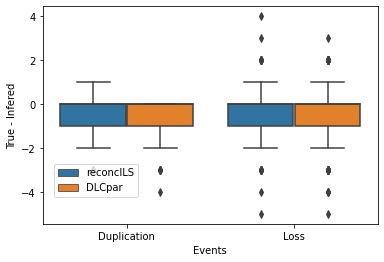

In [338]:
ax =sns.boxplot(x="variable", y="value",hue="Algorithm", data=pd.melt(new, id_vars =['Algorithm']))
plt.xlabel("Events")
plt.legend(bbox_to_anchor=(0.3,0.3))
plt.ylabel("True - Infered")
plt.savefig('box_plot.jpg', dpi=500)


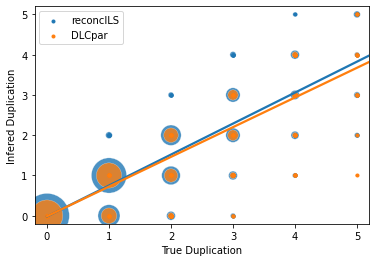

<Figure size 432x288 with 0 Axes>

In [339]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


result1 =pd.concat([True_Duplication['Duplication'],O_Duplication['Duplication']], ignore_index=True,axis=1)
result11=result1.groupby([0,1]).size().reset_index(name='Count')
result12 =pd.concat([True_Duplication['Duplication'],ETE3_Duplication['Duplication']], ignore_index=True,axis=1)
result22=result12.groupby([0,1]).size().reset_index(name='Count')
#sns.lmplot(x=result1[0], y=result1[1], data=result1);
sns.scatterplot(data=result11, x=0, y=1, size="Count", legend=False, sizes=(20, 2000), alpha=0.8)
sns.scatterplot(data=result22, x=0, y=1, size="Count", legend=False, sizes=(10, 1000), alpha=0.8)

# show the graph

ax=sns.regplot(x=result1[0], y=result1[1], data=result1,marker=".", fit_reg=True, scatter_kws={'alpha':1}, ci=None, label='reconcILS')
ax=sns.regplot(x=result12[0], y=result12[1], data=result12, marker=".",fit_reg=True,scatter_kws={'alpha':1}, ci=None, label='DLCpar')




plt.xlabel("True Duplication")
plt.ylabel("Infered Duplication")
# Show the plot
ax.set_xlim(-0.2, 5.2)
ax.set_ylim(-0.2, 5.2)

plt.legend(bbox_to_anchor=(0.28,1))

plt.savefig('regex_dups.png', dpi=500)

plt.show()
plt.clf()

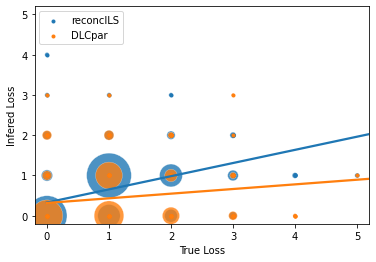

<Figure size 432x288 with 0 Axes>

In [340]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


result1 =pd.concat([TRUE_Loss['Loss'],O_Loss['Loss']], ignore_index=True,axis=1)
result11=result1.groupby([0,1]).size().reset_index(name='Count')

result12 =pd.concat([TRUE_Loss['Loss'],ETE3_Loss['Loss']], ignore_index=True,axis=1)
#sns.lmplot(x=result1[0], y=result1[1], data=result1);
result22=result12.groupby([0,1]).size().reset_index(name='Count')
sns.scatterplot(data=result11, x=0, y=1, size="Count", legend=False, sizes=(20, 2000), alpha=0.8)
sns.scatterplot(data=result22, x=0, y=1, size="Count", legend=False, sizes=(10, 1000), alpha=0.8)

ax=sns.regplot(x=result1[0], y=result1[1], data=result1,marker=".", fit_reg=True, scatter_kws={'alpha':1}, ci=None, label='reconcILS')
ax=sns.regplot(x=result12[0], y=result12[1], data=result12, marker=".",fit_reg=True,scatter_kws={'alpha':1}, ci=None, label='DLCpar')



plt.xlabel("True Loss")
plt.ylabel("Infered Loss")
# Show the plot
ax.set_xlim(-0.2, 5.2)
ax.set_ylim(-0.2, 5.2)

plt.legend(bbox_to_anchor=(0.28,1))

plt.savefig('regex_loss.png', dpi=500)

plt.show()
plt.clf()

In [219]:
r =result1.astype('category')

In [220]:
r

,0,1
0,5,4
1,1,0
2,2,0
3,1,0
4,6,5
...,...,...
923,2,1
924,0,0
925,2,3
926,1,0


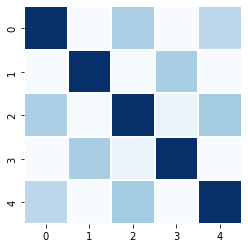

In [221]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.DataFrame(np.random.randn(50).reshape(10,5))
corr = df.corr()

ax1 = sns.heatmap(corr, cbar=0, linewidths=2,vmax=1, vmin=0, square=True, cmap='Blues')
plt.show()

In [162]:
np.array([list(result1[0]), list(result1[1])])

array([[5, 1, 2, ..., 2, 1, 1],
       [4, 0, 0, ..., 3, 0, 1]])

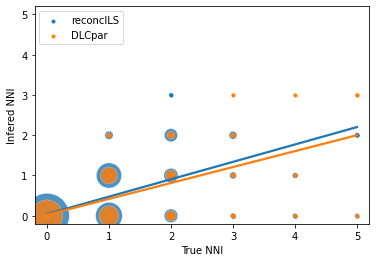

<Figure size 432x288 with 0 Axes>

In [308]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt






result1 =pd.concat([TRUE_NNI['NNI'],O_NNI['NNI']], ignore_index=True,axis=1)
result11=result1.groupby([0,1]).size().reset_index(name='Count')
result12 =pd.concat([True_DLCILS['DLCILS'],ETE3_DLCILS['DLCILS']], ignore_index=True,axis=1)
#sns.lmplot(x=result1[0], y=result1[1], data=result1);
result22=result12.groupby([0,1]).size().reset_index(name='Count')

#sns.lmplot(x=result1[0], y=result1[1], data=result1);
sns.scatterplot(data=result11, x=0, y=1, size="Count", legend=False, sizes=(20, 2000), alpha=0.8)
sns.scatterplot(data=result22, x=0, y=1, size="Count", legend=False, sizes=(10, 1000), alpha=0.8)

ax=sns.regplot(x=result1[0], y=result1[1], data=result1,marker=".", fit_reg=True, scatter_kws={'alpha':1}, ci=None, label='reconcILS')
ax=sns.regplot(x=result12[0], y=result12[1], data=result12, marker=".",fit_reg=True,scatter_kws={'alpha':1}, ci=None, label='DLCpar')



plt.xlabel("True NNI")
plt.ylabel("Infered NNI")
# Show the plot
ax.set_xlim(-0.2, 5.2)
ax.set_ylim(-0.2, 5.2)

plt.legend(bbox_to_anchor=(0.28,1))

plt.savefig('regex_NNI.png', dpi=500)

plt.show()
plt.clf()

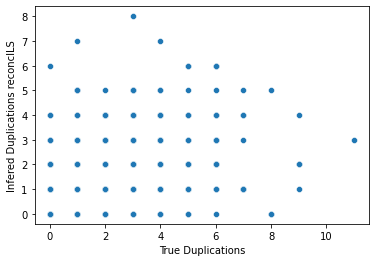

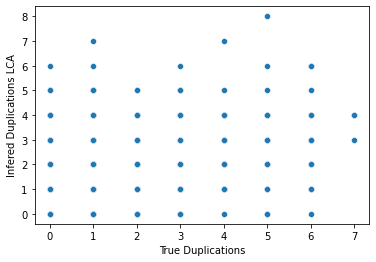

In [223]:
import seaborn as sns



result1 =pd.concat([TRUE_Loss,O_Loss.rename(columns={'b':'a'})], ignore_index=True,axis=1)
result2 =pd.concat([TRUE_Loss,ETE3_Loss.rename(columns={'b':'a'})], ignore_index=True,axis=1)
sns.scatterplot(data=result1,x=1,y=0)
plt.xlabel("True Duplications")
plt.ylabel("Infered Duplications reconcILS")
# Show the plot
plt.show()
plt.clf()

sns.scatterplot(data=result2,x=1,y=0)
plt.xlabel("True Duplications")
plt.ylabel("Infered Duplications LCA")
plt.show()

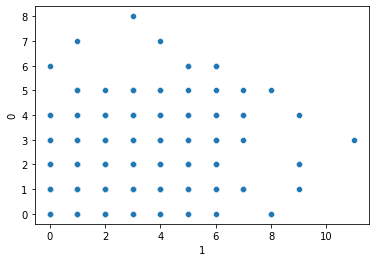

In [224]:
import seaborn as sns



result =pd.concat([TRUE_Loss,O_Loss.rename(columns={'b':'a'})], ignore_index=True,axis=1)
sns.scatterplot(data=result,x=1,y=0)
 
# Show the plot
plt.show()

In [309]:
from scipy.stats import spearmanr
rho, p = spearmanr(pd.DataFrame(list(df[(df.Process == "True Process")]['Loss']),columns=['NNI']),pd.DataFrame(list(df[(df.Process == "DLCpar")]['Loss']),columns=['NNI']))

In [310]:
rho

0.20168212530880128

In [311]:
from scipy.stats import spearmanr
rho, p = spearmanr(pd.DataFrame(list(df[(df.Process == "True Process")]['Loss']),columns=['NNI']),pd.DataFrame(list(df[(df.Process == "Our_algorithm")]['Loss']),columns=['NNI']))

In [312]:
rho

0.5601248146023136

In [313]:
from scipy.stats import spearmanr
rho, p = spearmanr(pd.DataFrame(list(df[(df.Process == "True Process")]['Duplication']),columns=['NNI']),pd.DataFrame(list(df[(df.Process == "DLCpar")]['Duplication']),columns=['NNI']))

In [314]:
rho

0.8706893376025674

In [319]:
from scipy.stats import spearmanr
rho, p = spearmanr(pd.DataFrame(list(df[(df.Process == "True Process")]['Duplication']),columns=['NNI']),pd.DataFrame(list(df[(df.Process == "Our_algorithm")]['Duplication']),columns=['NNI']))

In [320]:
rho

0.6939039172390007

In [317]:
from scipy.stats import spearmanr
rho, p = spearmanr(pd.DataFrame(list(df[(df.Process == "True Process")]['DLCILS']),columns=['NNI']),pd.DataFrame(list(df[(df.Process == "DLCpar")]['DLCILS']),columns=['NNI']))

In [318]:
rho

0.602357727605902

In [276]:
from scipy.stats import spearmanr
rho, p = spearmanr(pd.DataFrame(list(df[(df.Process == "True Process")]['NNI']),columns=['NNI']),pd.DataFrame(list(df[(df.Process == "Our_algorithm")]['NNI']),columns=['NNI']))

In [277]:
rho

0.7458413676922011